In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
movies = pd.read_csv("IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

/Users/ashleystojak/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)
moviesdf.drop(moviesdf.loc[moviesdf['year']=="TV Movie 2019"].index, inplace=True)

In [4]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"].fillna(0, inplace=True)
moviesdf["reviews_from_critics"].fillna(0, inplace=True)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [5]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf.fillna("UNKNOWN", inplace=True)
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [6]:
ratings = pd.read_csv("IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [7]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [8]:
ratingsdf.fillna(0, inplace=True)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [9]:
# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')

# removes all movies that do not have USA as one of the countries
complete_df.loc[ (complete_df['country'].str.contains('USA') == False), 'country'] = np.NaN
complete_df.dropna(inplace=True)
print(complete_df.isnull().sum()) # all n/a should be dropped

complete_df['avg_vote'] = complete_df['avg_vote'].round()
complete_df['mean_vote'] = complete_df['mean_vote'].round()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

In [10]:
### Splitting Genres

col = set()

a = list(complete_df["genre"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['genre'].str.contains(g),g] = 1
    
complete_df.head(10)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Family,Reality-TV,Action,Biography,Sci-Fi,Documentary,Film-Noir,Music,Drama,Adult
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45.0,USA,None,Alexander Black,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,0,0,0,0,0,0,0,0,1,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,0,0,0,1,0,0,0,0,1,0
9,tt0002461,Richard III,Richard III,1912,10/15/12,Drama,55.0,"France, USA",English,"André Calmettes, James Keane",...,0,0,0,0,0,0,0,0,1,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,5/17/14,Drama,55.0,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,1,0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,11/24/13,"Crime, Drama",88.0,USA,English,George Loane Tucker,...,0,0,0,0,0,0,0,0,1,0
22,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,8/24/14,"Crime, Drama, Horror",78.0,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,1,0
23,tt0003657,The Bargain,The Bargain,1914,12/3/14,Western,70.0,USA,English,Reginald Barker,...,0,0,0,0,0,0,0,0,0,0
25,tt0003772,Cinderella,Cinderella,1914,12/28/14,"Fantasy, Drama",52.0,USA,English,James Kirkwood,...,0,0,0,0,0,0,0,0,1,0
28,tt0003973,A Florida Enchantment,A Florida Enchantment,1914,9/4/16,Comedy,63.0,USA,English,Sidney Drew,...,0,0,0,0,0,0,0,0,0,0


In [11]:
### Splitting Genres

col = set()

a = list(complete_df["country"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['country'].str.contains(g),g] = 1
    
complete_df.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Malaysia,India,Czechoslovakia,Colombia,Austria,Canada,Australia,Costa Rica,Russia,Hungary
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45.0,USA,None,Alexander Black,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,0,0,0,0,0,0,0,0,0,0
9,tt0002461,Richard III,Richard III,1912,10/15/12,Drama,55.0,"France, USA",English,"André Calmettes, James Keane",...,0,0,0,0,0,0,0,0,0,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,5/17/14,Drama,55.0,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,0,0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,11/24/13,"Crime, Drama",88.0,USA,English,George Loane Tucker,...,0,0,0,0,0,0,0,0,0,0
22,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,8/24/14,"Crime, Drama, Horror",78.0,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,0,0
23,tt0003657,The Bargain,The Bargain,1914,12/3/14,Western,70.0,USA,English,Reginald Barker,...,0,0,0,0,0,0,0,0,0,0
25,tt0003772,Cinderella,Cinderella,1914,12/28/14,"Fantasy, Drama",52.0,USA,English,James Kirkwood,...,0,0,0,0,0,0,0,0,0,0
28,tt0003973,A Florida Enchantment,A Florida Enchantment,1914,9/4/16,Comedy,63.0,USA,English,Sidney Drew,...,0,0,0,0,0,0,0,0,0,0


# EDA

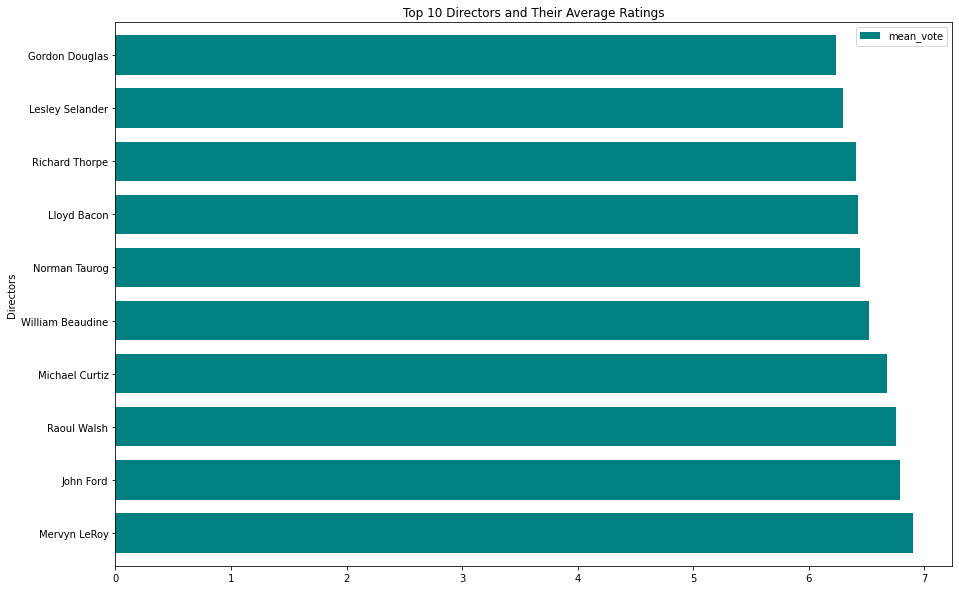

In [12]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", title="Top 10 Directors and Their Average Ratings", color=["teal"]);


## Old EDA Based on Grouped Genres

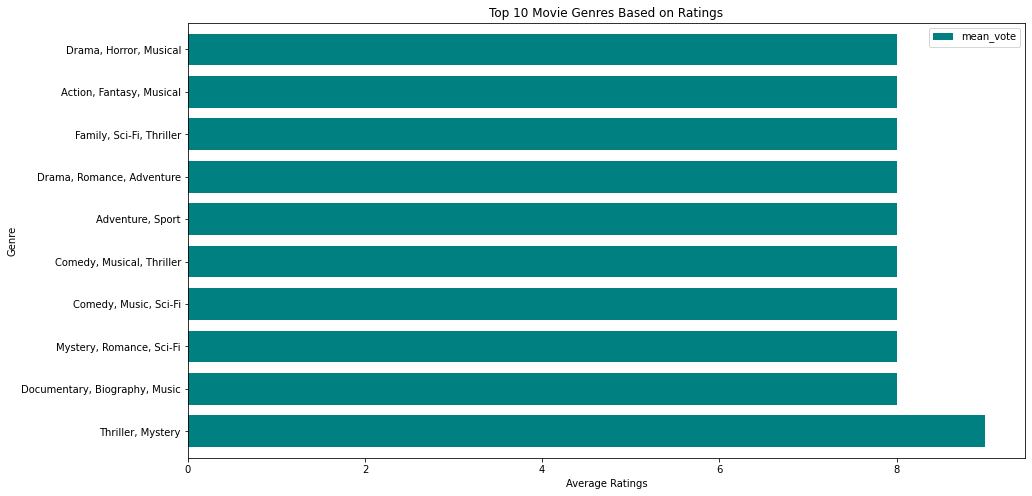

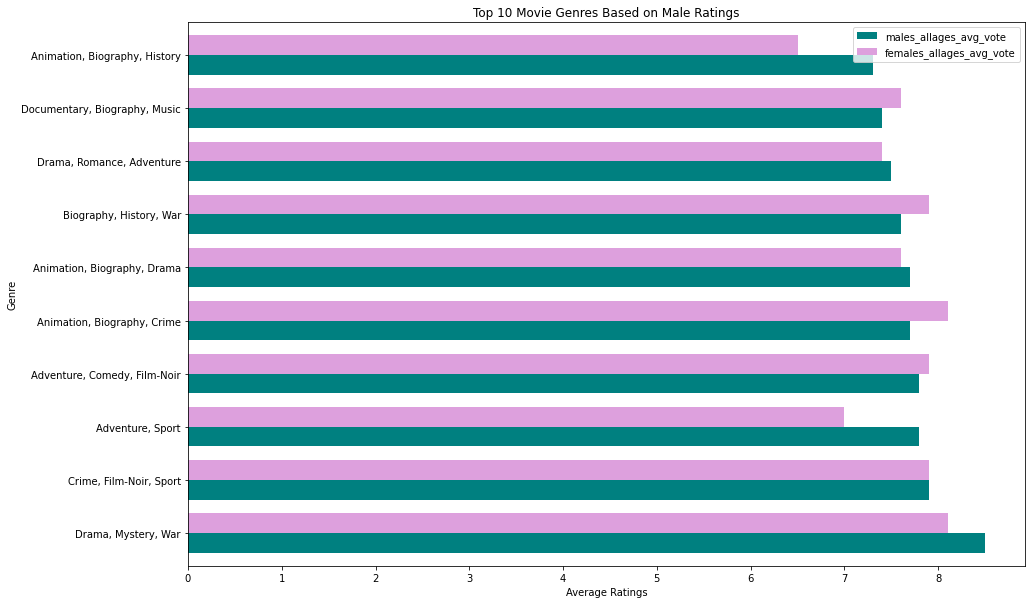

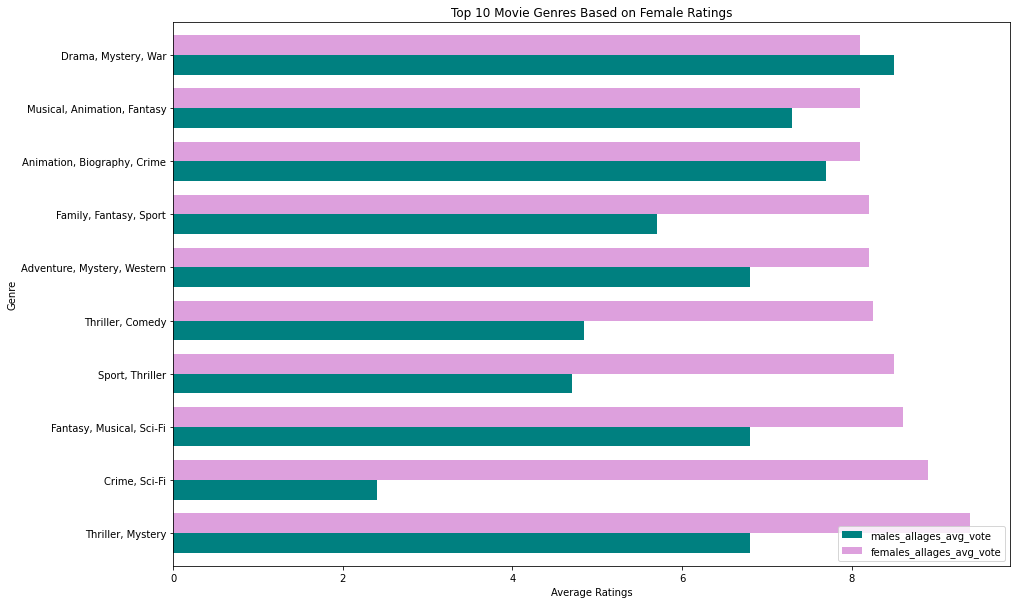

In [13]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

## New EDA Based on Single Genres

In [14]:
Comedy = complete_df.groupby(['Comedy'])[['males_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['males_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['males_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['males_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['males_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['males_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['males_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['males_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['males_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['males_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['males_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['males_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['males_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['males_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['males_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['males_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['males_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['males_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['males_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['males_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['males_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['males_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['males_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['males_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['males_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
male_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Male Mean Vote")

male_genres_melt = male_genres_melt.loc[male_genres_melt["Male Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

male_genres_melt.insert(loc=0, column='Genres', value=genres)
male_genres_melt.head()

male_genres_melt.drop(['Genre'], axis=1)


,Genres,Male Mean Vote
1,Comedy,5.608016
3,Action,5.265715
5,Horror,4.483483
7,Family,5.485058
9,Musical,6.010323
11,Music,5.981324
13,Documentary,7.400000
15,Mystery,5.552275
17,Sci-Fi,4.807817
19,News,6.000000


In [15]:
Comedy = complete_df.groupby(['Comedy'])[['females_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['females_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['females_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['females_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['females_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['females_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['females_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['females_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['females_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['females_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['females_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['females_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['females_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['females_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['females_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['females_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['females_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['females_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['females_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['females_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['females_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['females_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['females_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['females_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['females_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
female_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Female Mean Vote")

female_genres_melt = female_genres_melt.loc[female_genres_melt["Female Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

female_genres_melt.insert(loc=0, column='Genres', value=genres)
female_genres_melt.head()

female_genres_melt.drop(['Genre'], axis=1)


,Genres,Female Mean Vote
1,Comedy,5.880789
3,Action,5.540464
5,Horror,4.707007
7,Family,6.061849
9,Musical,6.387174
11,Music,6.351722
13,Documentary,7.600000
15,Mystery,5.824495
17,Sci-Fi,5.079846
19,News,7.500000


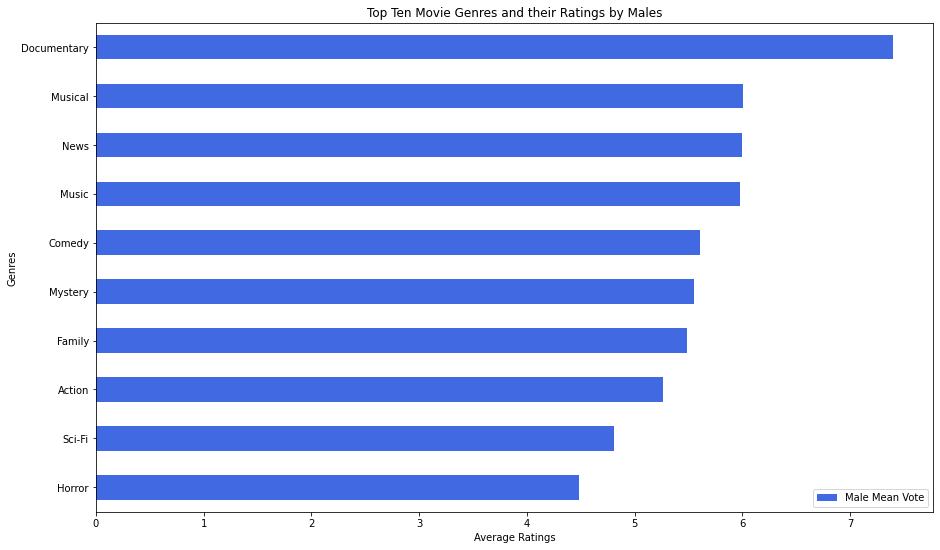

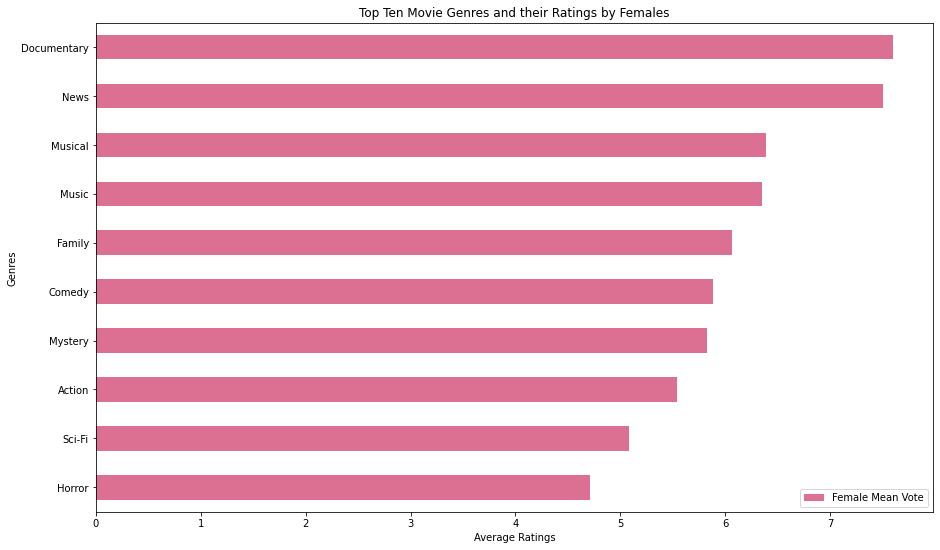

In [16]:
# Top ten movie genres based on ratings by male and females
top_ten_male_genres_melt = male_genres_melt.head(10)
top_ten_female_genres_melt = female_genres_melt.head(10)

top_ten_male_genres_melt = top_ten_male_genres_melt.sort_values(['Male Mean Vote'], ascending = True);
top_ten_female_genres_melt = top_ten_female_genres_melt.sort_values(['Female Mean Vote'], ascending = True);

top_ten_male_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="royalblue", title="Top Ten Movie Genres and their Ratings by Males")
plt.xlabel("Average Ratings")
top_ten_female_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="palevioletred", title="Top Ten Movie Genres and their Ratings by Females")
plt.xlabel("Average Ratings");

In [17]:
Comedy = complete_df.groupby(['Comedy'])[['mean_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['mean_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['mean_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['mean_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['mean_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['mean_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['mean_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['mean_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['mean_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['mean_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['mean_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['mean_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['mean_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['mean_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['mean_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['mean_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['mean_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['mean_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['mean_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['mean_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['mean_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['mean_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['mean_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['mean_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['mean_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Mean Vote")

genres_melt = genres_melt.loc[genres_melt["Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

genres_melt.insert(loc=0, column='Genres', value=genres)
genres_melt.head()

genres_melt.drop(['Genre'], axis=1)


,Genres,Mean Vote
1,Comedy,6.085255
3,Action,5.699896
5,Horror,5.051570
7,Family,6.129822
9,Musical,6.472367
11,Music,6.431109
13,Documentary,8.000000
15,Mystery,5.946577
17,Sci-Fi,5.285133
19,News,7.000000


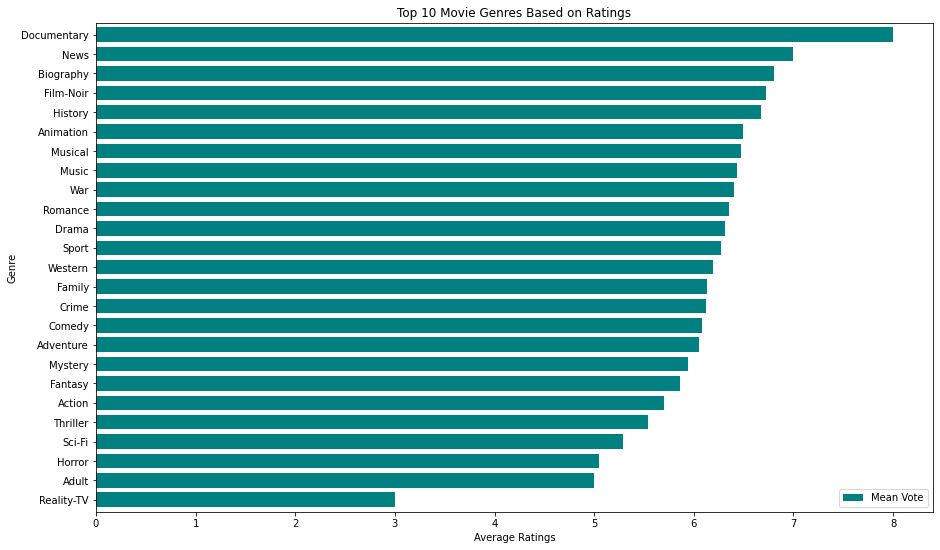

In [18]:
# Top ten movie genres based on ratings
genres_melt = genres_melt.sort_values(['Mean Vote'], ascending = True);
genres_melt.plot.barh(figsize=(15,9), x="Genres", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');

## EDA for Country Data

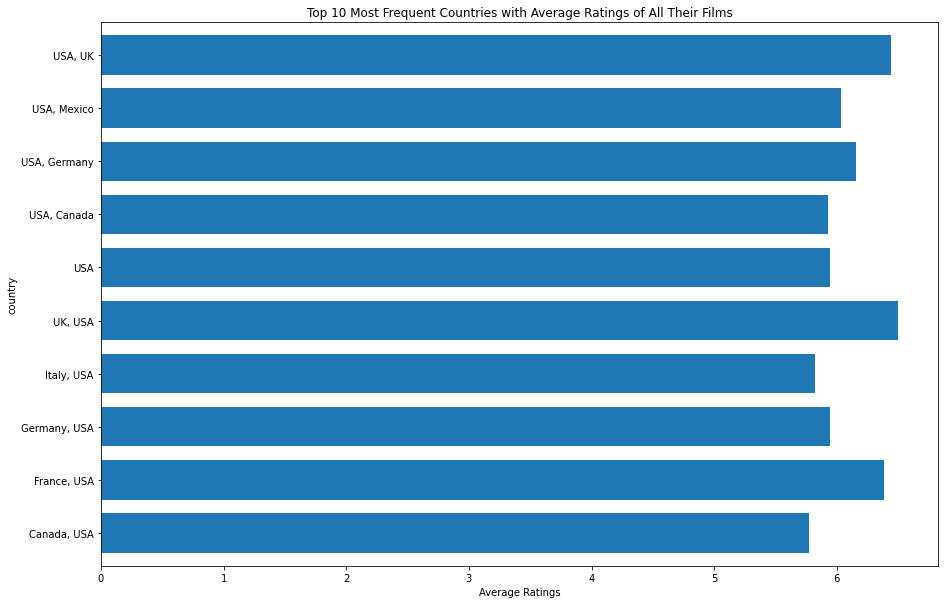

In [19]:
## EDA, Looking For Relation between Country Origin & Rating
## ---------------------------------------------------------

## Finding Most Used Countries (top 10)
most_freq_countries = list(complete_df['country'].value_counts()[:10].index)

## Shrink Dataframe by Top10 Countries
df = complete_df[complete_df['country'].isin(most_freq_countries)]

## Calculating Avg Rating per Countries
s = df.groupby(by=['country'])['mean_vote'].sum() #sum
c = df['country'].value_counts()                  #counts

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c

## Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

Text(0.5, 0, 'Counts')

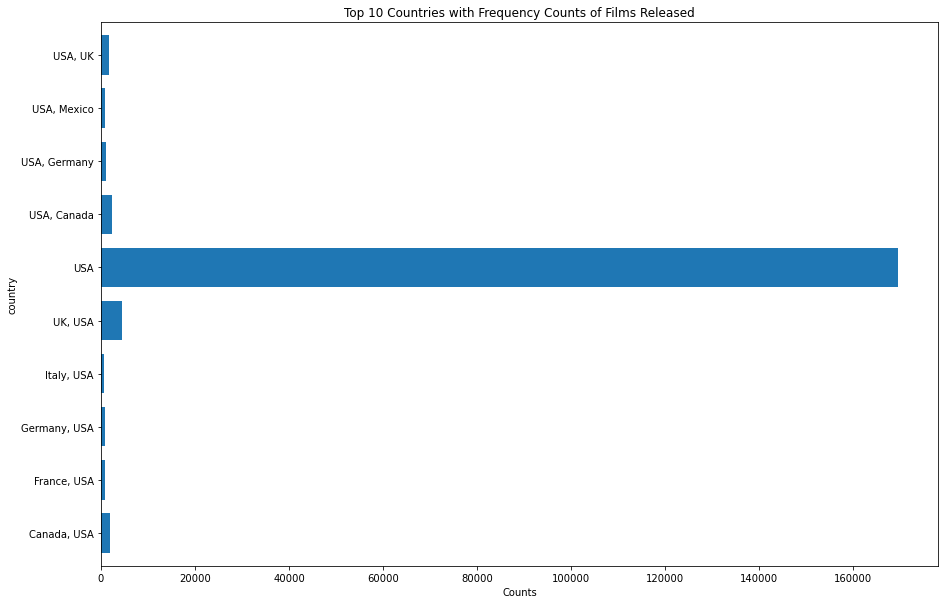

In [20]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

#Plotting Freq Counts
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Films Released")
plt.xlabel("Counts")

<ipython-input-21-f1fe7e832fe4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_freq_countries)


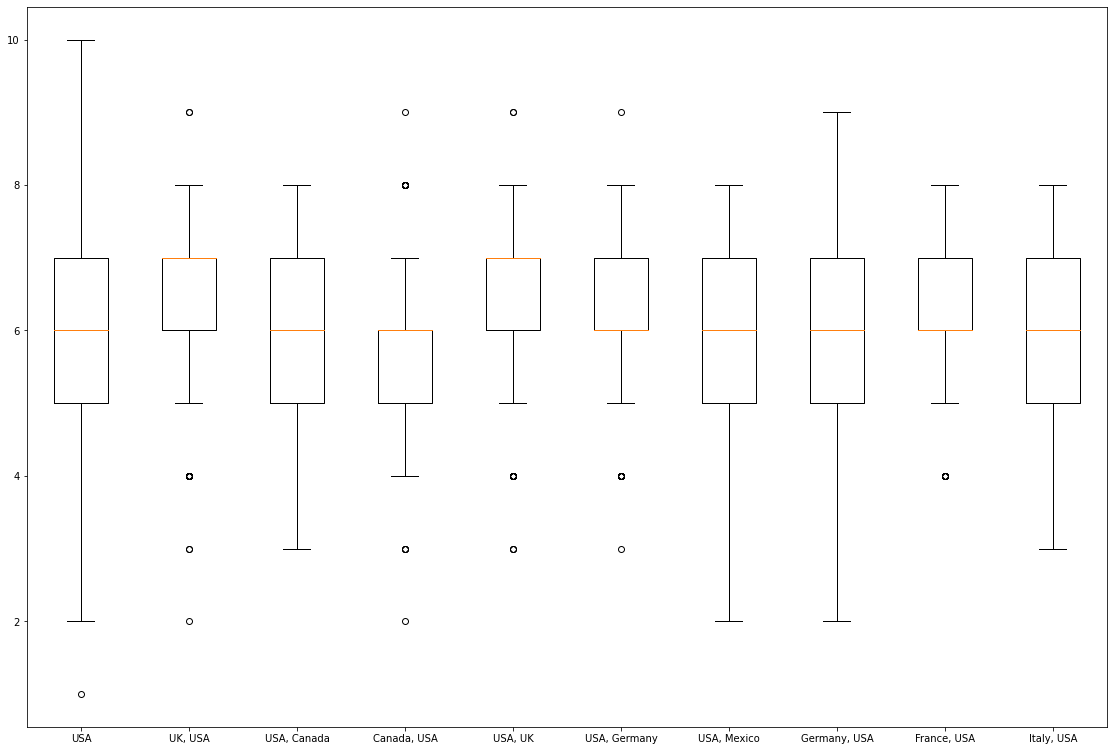

In [21]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df_ = df[df['country'] == i]
    country.append(df_['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

plt.show()

# Modeling

In [22]:
complete_df.to_csv("clean_data.csv", sep=',')


In [23]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn import datasets

#understand what the fuck this code is doing, cause idk
# def encode_target(df, target_column):

#     df_mod = df.copy()
#     targets = df_mod['mean_vote'].unique()
#     map_to_int = {name: n for n, name in enumerate(targets)}
#     df_mod["Target"] = df_mod[target_column].replace(map_to_int)

#     return (df_mod, targets)

# X,y = encode_target(complete_df, "mean_vote")
# clf = DecisionTreeClassifier(criterion = 'entropy')

In [24]:
from sklearn.linear_model import LogisticRegression

features = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'duration', 'year', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

X = np.array(df[features])
y = np.array(df['mean_vote'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 35)

In [26]:
from sklearn import metrics

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       0.05      0.02      0.03       114
         3.0       0.10      0.07      0.08       631
         4.0       0.23      0.24      0.24      2075
         5.0       0.25      0.26      0.25      3478
         6.0       0.41      0.52      0.46      7825
         7.0       0.40      0.34      0.37      5815
         8.0       0.26      0.08      0.13      1570
         9.0       0.00      0.00      0.00       103
        10.0       0.00      0.00      0.00         3

    accuracy                           0.35     21614
   macro avg       0.19      0.17      0.17     21614
weighted avg       0.34      0.35      0.34     21614



/Users/ashleystojak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleystojak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleystojak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)